**The objective of the dataset is to predict whether a patient has diabetes or not.**

**Importing the Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#loading the diabetes dataset to a pandas DataFrame
df=pd.read_csv("diabetes.csv")


**Pregnancies** : To express the Number of pregnancies

**Glucose**: To express the Glucose level in blood

**BloodPressure**: To express the Blood pressure measurement

**SkinThickness**: To express the thickness of the skin

**Insulin**: To express the Insulin level in blood

**BMI**: To express the Body mass index

**DiabetesPedigreeFunction**: To express the Diabetes percentage

**Age**: To express the age

**Outcome**: To express the final result 1 is **Yes** and 0 is **No**

In [3]:
# printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Exploratory Data Analysis**

In [4]:
#checking for number of nulls present in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

In [6]:
#getting info for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observation**

From the above statistical measures we can find that some of the value for the columns(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI) repesent zero in min. But these cannot be zero.So we assign those value with the mean of thier corresponding column.

# **Data Cleaning**

In [8]:
# checking for value 0 in every column, since we are considering 0 as null in the dataset.
print("Pregnancies",df[df["Pregnancies"]==0].shape)
print("Glucose",df[df["Glucose"]==0].shape)
print("BloodPressure",df[df["BloodPressure"]==0].shape)
print("SkinThickness",df[df["SkinThickness"]==0].shape)
print("Insulin",df[df["Insulin"]==0].shape)
print("BMI",df[df["BMI"]==0].shape)



Pregnancies (111, 9)
Glucose (5, 9)
BloodPressure (35, 9)
SkinThickness (227, 9)
Insulin (374, 9)
BMI (11, 9)


In [9]:
# coverting 0 to mean of their corresponding column.

df.Pregnancies.replace(0,np.mean(df.Pregnancies),inplace=True)
df.Glucose.replace(0,np.mean(df.Glucose),inplace=True)
df.BloodPressure.replace(0,np.mean(df.BloodPressure),inplace=True)
df.SkinThickness.replace(0,np.mean(df.SkinThickness),inplace=True)
df.Insulin.replace(0,np.mean(df.Insulin),inplace=True)
df.BMI.replace(0,np.mean(df.BMI),inplace=True)

In [10]:
# checking for any other presence of data 0.
print("Pregnancies",df[df["Pregnancies"]==0].shape)
print("Glucose",df[df["Glucose"]==0].shape)
print("BloodPressure",df[df["BloodPressure"]==0].shape)
print("SkinThickness",df[df["SkinThickness"]==0].shape)
print("Insulin",df[df["Insulin"]==0].shape)
print("BMI",df[df["BMI"]==0].shape)

Pregnancies (0, 9)
Glucose (0, 9)
BloodPressure (0, 9)
SkinThickness (0, 9)
Insulin (0, 9)
BMI (0, 9)


In [11]:
#Grouping by the target column and analysing the mean of the dataset. And providing simple conclusion.
#those value for pregnancies, age, BMI,Glucose are playing good role in determining the Output of the dataset.
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.859378,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,5.410866,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


# **Data** **Visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


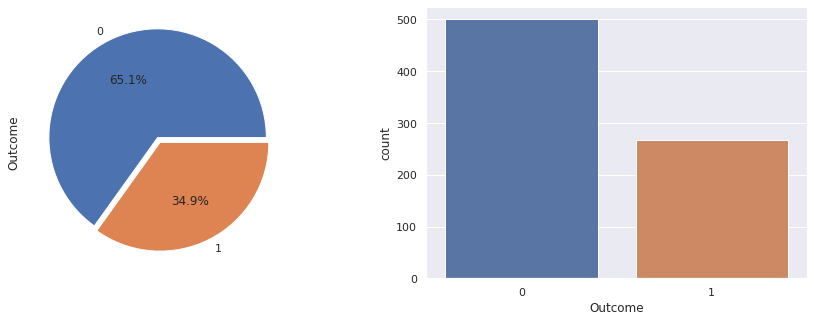

In [28]:
#Visualization with pieplot and countplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df["Outcome"].value_counts().plot.pie(ax=axes[0],explode=[0.05,0],autopct="%2.1f%%")
sns.countplot("Outcome",data=df,ax=axes[1])
   
#From the graph the data could be concluded with 65.1% with non diabetic patiants and rest is affected with diabetics.

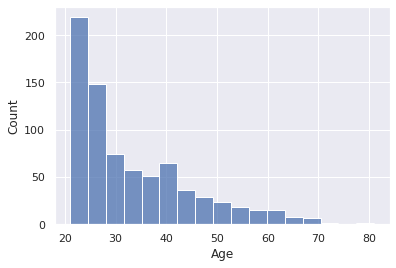

In [29]:
#Visualization with histplot
sns.histplot(data=df, x="Age")
#The conclusion that can be drawn from here is that most of the patients are from the age group of 20-30

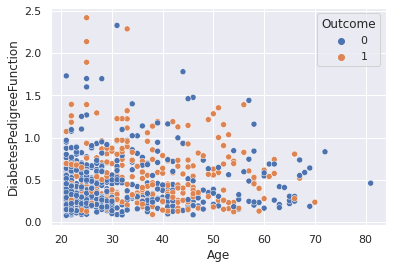

In [30]:
#Visualization with scatterplot
sns.scatterplot(data=df, x="Age", y="DiabetesPedigreeFunction",hue="Outcome")
#As per the data, when a patient gets older he more chance of getting affected by diabetes.

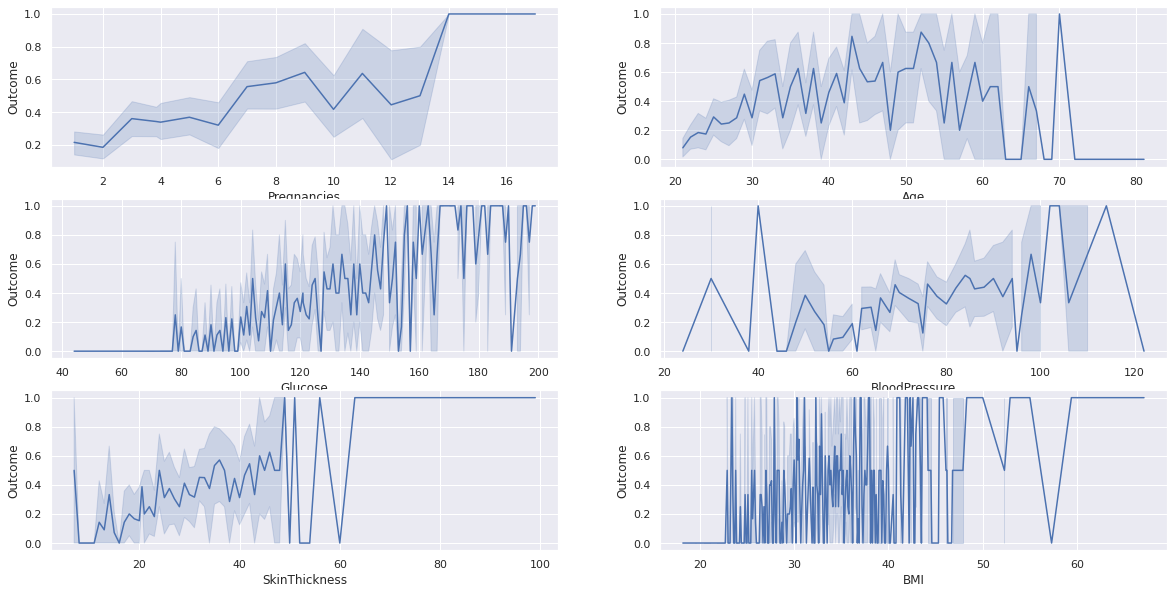

In [31]:
#Visualization with lineplot for some columns against Outcome and sees the relation between them
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
sns.lineplot(data=df, x="Pregnancies", y="Outcome",ax=axes[0][0])
sns.lineplot(data=df, x="Age", y="Outcome",ax=axes[0][1])
sns.lineplot(data=df, x="Glucose", y="Outcome",ax=axes[1][0])
sns.lineplot(data=df, x="BloodPressure", y="Outcome",ax=axes[1][1])
sns.lineplot(data=df, x="SkinThickness", y="Outcome",ax=axes[2][0])
sns.lineplot(data=df, x="BMI", y="Outcome",ax=axes[2][1])

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


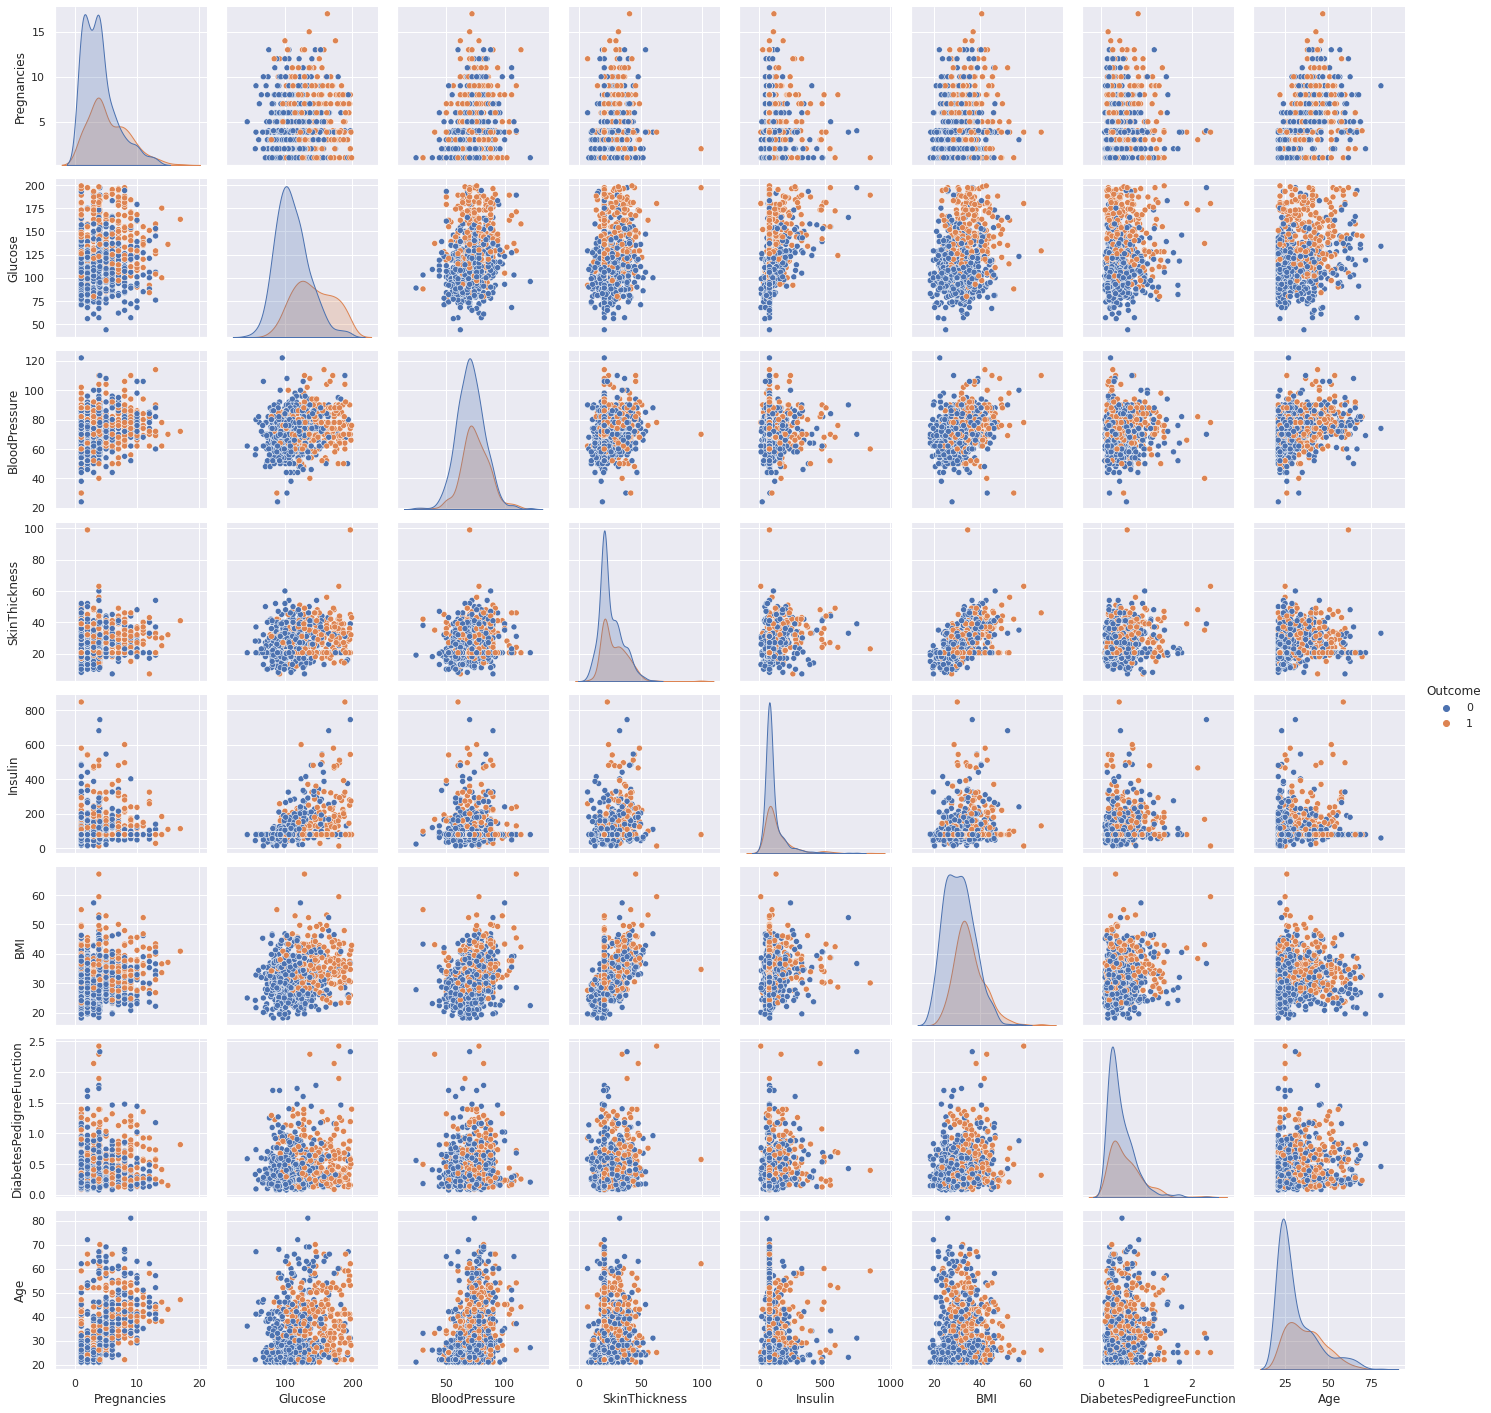

In [33]:
#Pairplot Visualization
sns.pairplot(df,hue="Outcome")

In [34]:
#Coorelation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261,0.247971
Glucose,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.247971,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


In [35]:

df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [36]:
# separating the data and labels
x = df.drop('Outcome', 1)
y = df["Outcome"]

<ipython-input-36-1dd143951f58>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop('Outcome', 1)


In [37]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [38]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# **Data Standardization**

In [39]:
scaler=StandardScaler()


In [40]:
scaler.fit(x)

StandardScaler()

In [41]:
new_x= scaler.transform(x)

In [42]:
new_x


array([[ 0.5362511 ,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-1.1403533 , -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.20689286,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.20093022, -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-1.1403533 ,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-1.1403533 , -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [43]:
x=new_x
print(x)
print(y)

[[ 0.5362511   0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-1.1403533  -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.20689286  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.20093022 -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-1.1403533   0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-1.1403533  -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Testing and Training data**

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=2)

**LogisticRegression**

In [88]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [89]:
#predicting with testing dataset
y_logistic = lr_model.predict(x_test)

y_logistic

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [90]:
#predicting with training dataset
y_logistic1 = lr_model.predict(x_train)

y_logistic1

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



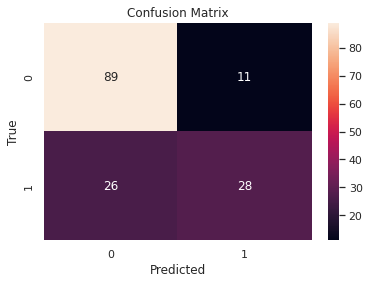

In [91]:
#classification_report and confusion_matrix
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_logistic)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_logistic))


In [92]:
#accuracy_score for testing dataset
from sklearn.metrics import accuracy_score
lr_accuracy =accuracy_score(y_test,y_logistic)
lr_accuracy

0.7597402597402597

In [93]:
#accuracy_score for training dataset
accuracy_score(y_train,y_logistic1)

0.7785016286644951

**DecisionTreeClassifier**

In [51]:
from sklearn.tree import DecisionTreeClassifier  
classifier1= DecisionTreeClassifier(criterion='entropy', random_state=2)  
classifier1.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [52]:
#predicting with testing dataset
y_DT= classifier1.predict(x_test)  

In [53]:
# accuracy for testing dataset
from sklearn.metrics import accuracy_score
dt_accuracy=accuracy_score(y_DT,y_test)
dt_accuracy

0.7077922077922078

In [54]:
## accuracy for training dataset
y_DT1= classifier1.predict(x_train)  
accuracy_score(y_train,y_DT1)

#Here the data is overfitting 

1.0

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



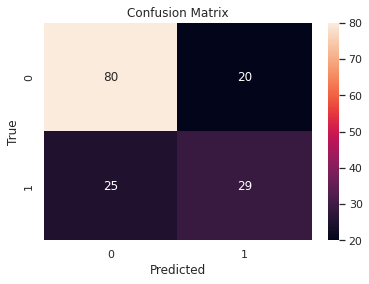

In [55]:
#classification_report and confusion_matrix
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_DT)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_DT))

**RandomForestClassifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier  
classifier2= RandomForestClassifier(n_estimators= 50, criterion="entropy")  
classifier2.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [57]:
#predicting with testing dataset
y_RF= classifier2.predict(x_test)

In [58]:
# accuracy for testing dataset
from sklearn.metrics import accuracy_score
rt_accuracy=accuracy_score(y_RF,y_test)
rt_accuracy

0.7467532467532467

In [59]:
# accuracy for training dataset
y_RF1= classifier2.predict(x_train)

accuracy_score(y_train,y_RF1)


#Here the data is overfitting 

1.0

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.68      0.52      0.59        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



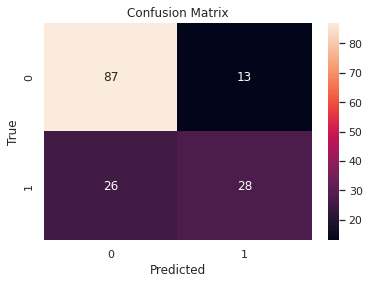

In [60]:
#classification_report and confusion_matrix
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_RF)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_RF))

**svm**

In [73]:
from sklearn.svm import SVC
classifier3 = SVC(kernel='linear', random_state=0)  
classifier3.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [74]:
#predicting with testing dataset
y_svm= classifier3.predict(x_test)


In [75]:
# accuracy for testing dataset
from sklearn.metrics import accuracy_score
svm_accuracy=accuracy_score(y_svm,y_test)
svm_accuracy

0.7727272727272727

In [77]:
# accuracy for training dataset
y_svm1= classifier3.predict(x_train)

accuracy_score(y_svm1,y_train)

0.7817589576547231

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



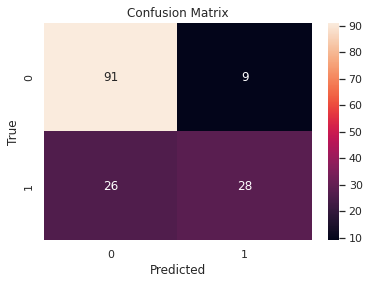

In [79]:
#classification_report and confusion_matrix
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_svm)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_svm))

In [97]:
print("Logistic Regression accuracy      :",lr_accuracy,"  training :",accuracy_score(y_train,y_logistic1))
print("Decision Tree Classifier accuracy :",dt_accuracy,"  training :",accuracy_score(y_train,y_DT1))
print("Random Forest accuracy            :",rt_accuracy,"  training :",accuracy_score(y_train,y_RF1))
print("SVM accuracy                      :",svm_accuracy,"  training :",accuracy_score(y_svm1,y_train))

Logistic Regression accuracy      : 0.7597402597402597   training : 0.7785016286644951
Decision Tree Classifier accuracy : 0.7077922077922078   training : 1.0
Random Forest accuracy            : 0.7467532467532467   training : 1.0
SVM accuracy                      : 0.7727272727272727   training : 0.7817589576547231


# **Observation**
From the above predicted model accuracy, we could conclude that SVM classification and Logistic Regression have best accuracy than other models. From these two SVM is performing higher in accuracy than Logistic Regression. So we conclude SVM as the model to be used and proceeding with saving and loading data in a pickle.

# **Save and load the model with Pickle**

In [81]:
import pickle
filename = "my_model.pickle"
pickle.dump(classifier3, open(filename, "wb"))
loaded_model= pickle.load(open(filename, "rb")) 

In [82]:
loaded_model.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

# **Prediction System**

In [85]:
input_data=(3,126,88,41,23,39.3,0.704,27)     #input data
n=np.asarray(input_data)                      #converted into numpy array
reshaped=n.reshape(1,-1)                      #trying to predict for only one instance
std_data=scaler.transform(reshaped)           #Standerdized the data
print(std_data)


[[-0.46971154  0.14197684  1.30039148  1.49543565 -1.02838563  0.9968416
   0.70104112 -0.53102292]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
predicted=loaded_model.predict(std_data)    #predicting with loaded data
if predicted == 0:
  print("Not Diabetic")
else:
  print("Diabetic")

Not Diabetic
